# Lab 6

By Niksh Hiremath (U20240158)


## 1. Code


### Importing libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)

### Loading dataset


In [2]:
# Loading train dataset
train_df = pd.read_csv("tblTrain.csv")
train_df.shape

(2797, 4)

In [3]:
train_df.head()

,Name,Duration,Genre,Rating
0,#Gadhvi (He thought he was Gandhi),99,Drama,7.0
1,@Andheri,126,Action,4.0
2,1:1.6 An Ode to Lost Love,86,Drama,6.2
3,13B: Fear Has a New Address,136,Drama,7.3
4,15th August,158,Drama,5.6


In [4]:
# Loading test dataset
test_df = pd.read_csv("tblTest.csv")
test_df.shape

(699, 4)

In [5]:
test_df.head()

,Name,Duration,Genre,Rating
0,...Yahaan,132,Drama,7.4
1,15 Park Avenue,106,Drama,7.1
2,1971,146,Action,8.1
3,5ters: Castle of Dark Master,120,Action,4.6
4,7 Bijliyaan,136,Action,5.0


### Plotting the dataset


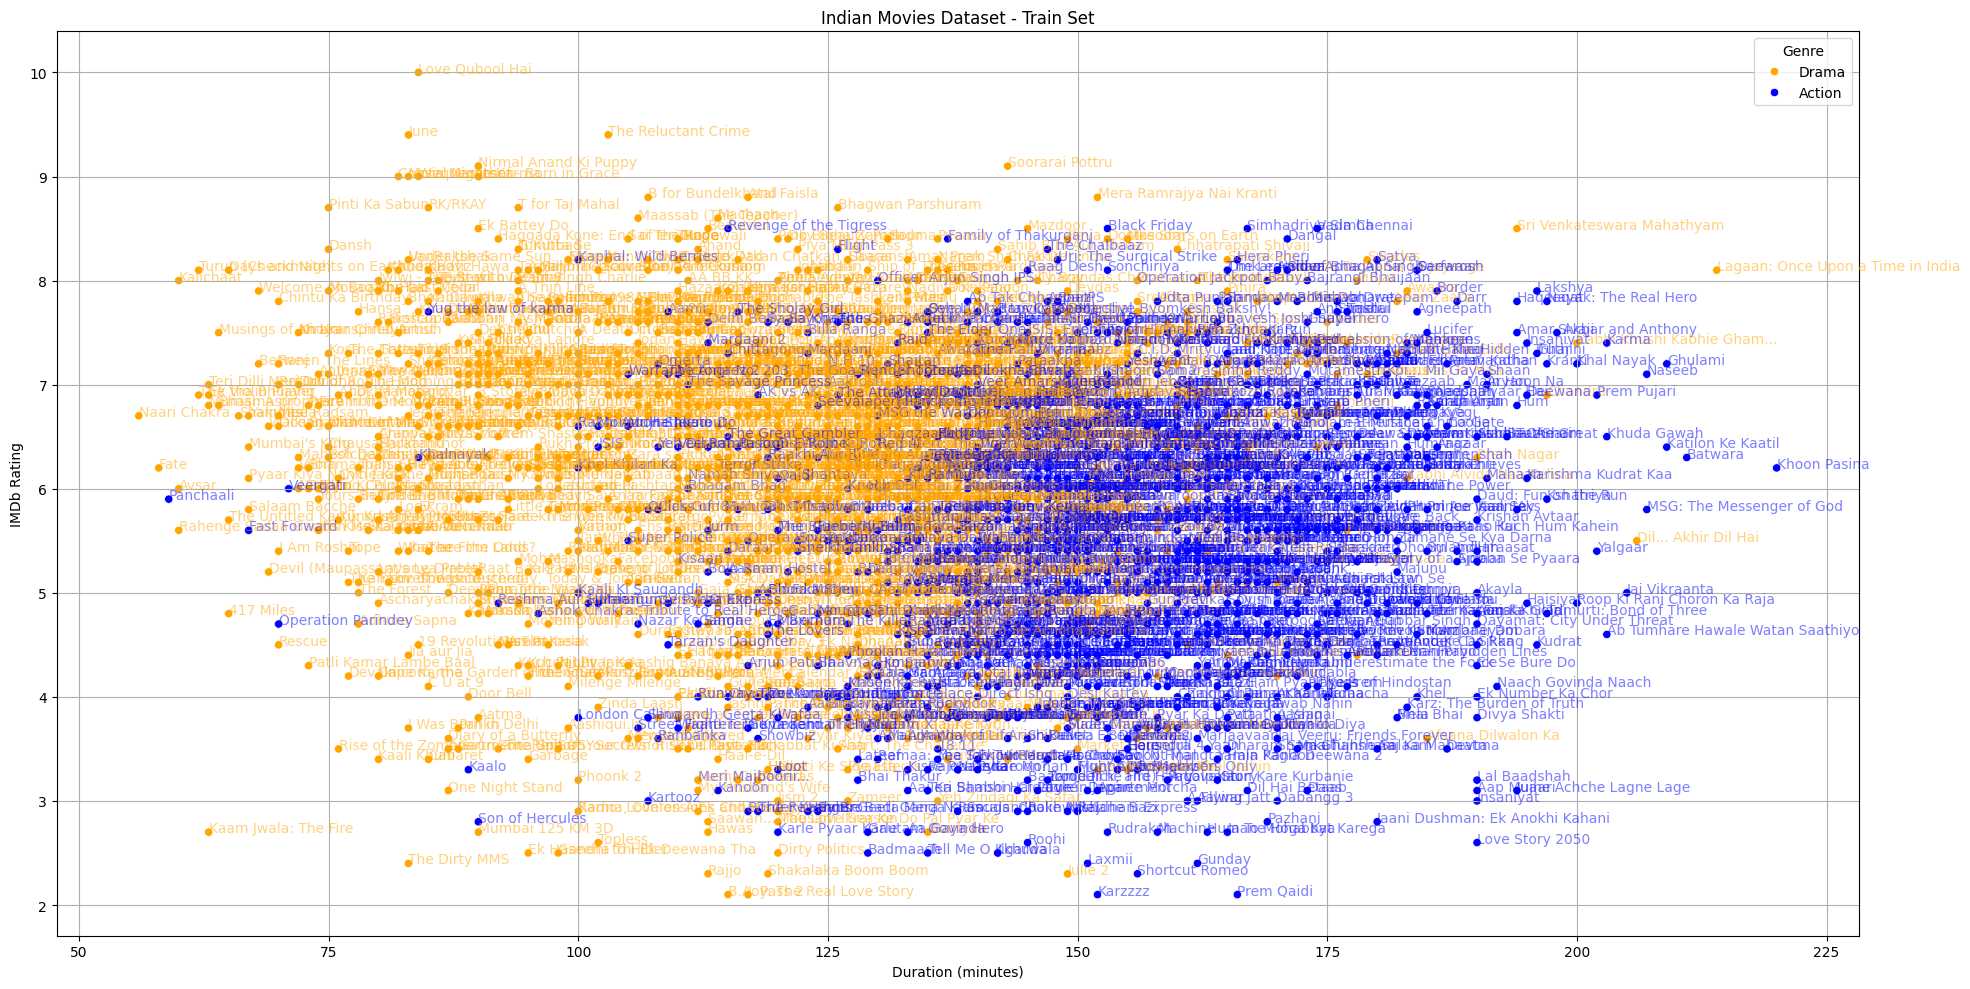

In [11]:
plt.figure(figsize=(20, 10))

# Plotting training data
sns.scatterplot(
    data=train_df,
    x="Duration",
    y="Rating",
    hue="Genre",
    palette={"Drama": "orange", "Action": "blue"},
    legend="brief",
)

# Annotating training data points
for idx, row in train_df.iterrows():
    color = "orange" if row["Genre"] == "Drama" else "blue"
    plt.annotate(
        row["Name"],
        (row["Duration"], row["Rating"]),
        color=color,
        alpha=0.5,
    )

plt.title("Indian Movies Dataset - Train Set")
plt.xlabel("Duration (minutes)")
plt.ylabel("IMDb Rating")
plt.legend(title="Genre")
plt.tight_layout()
plt.grid()
plt.show()

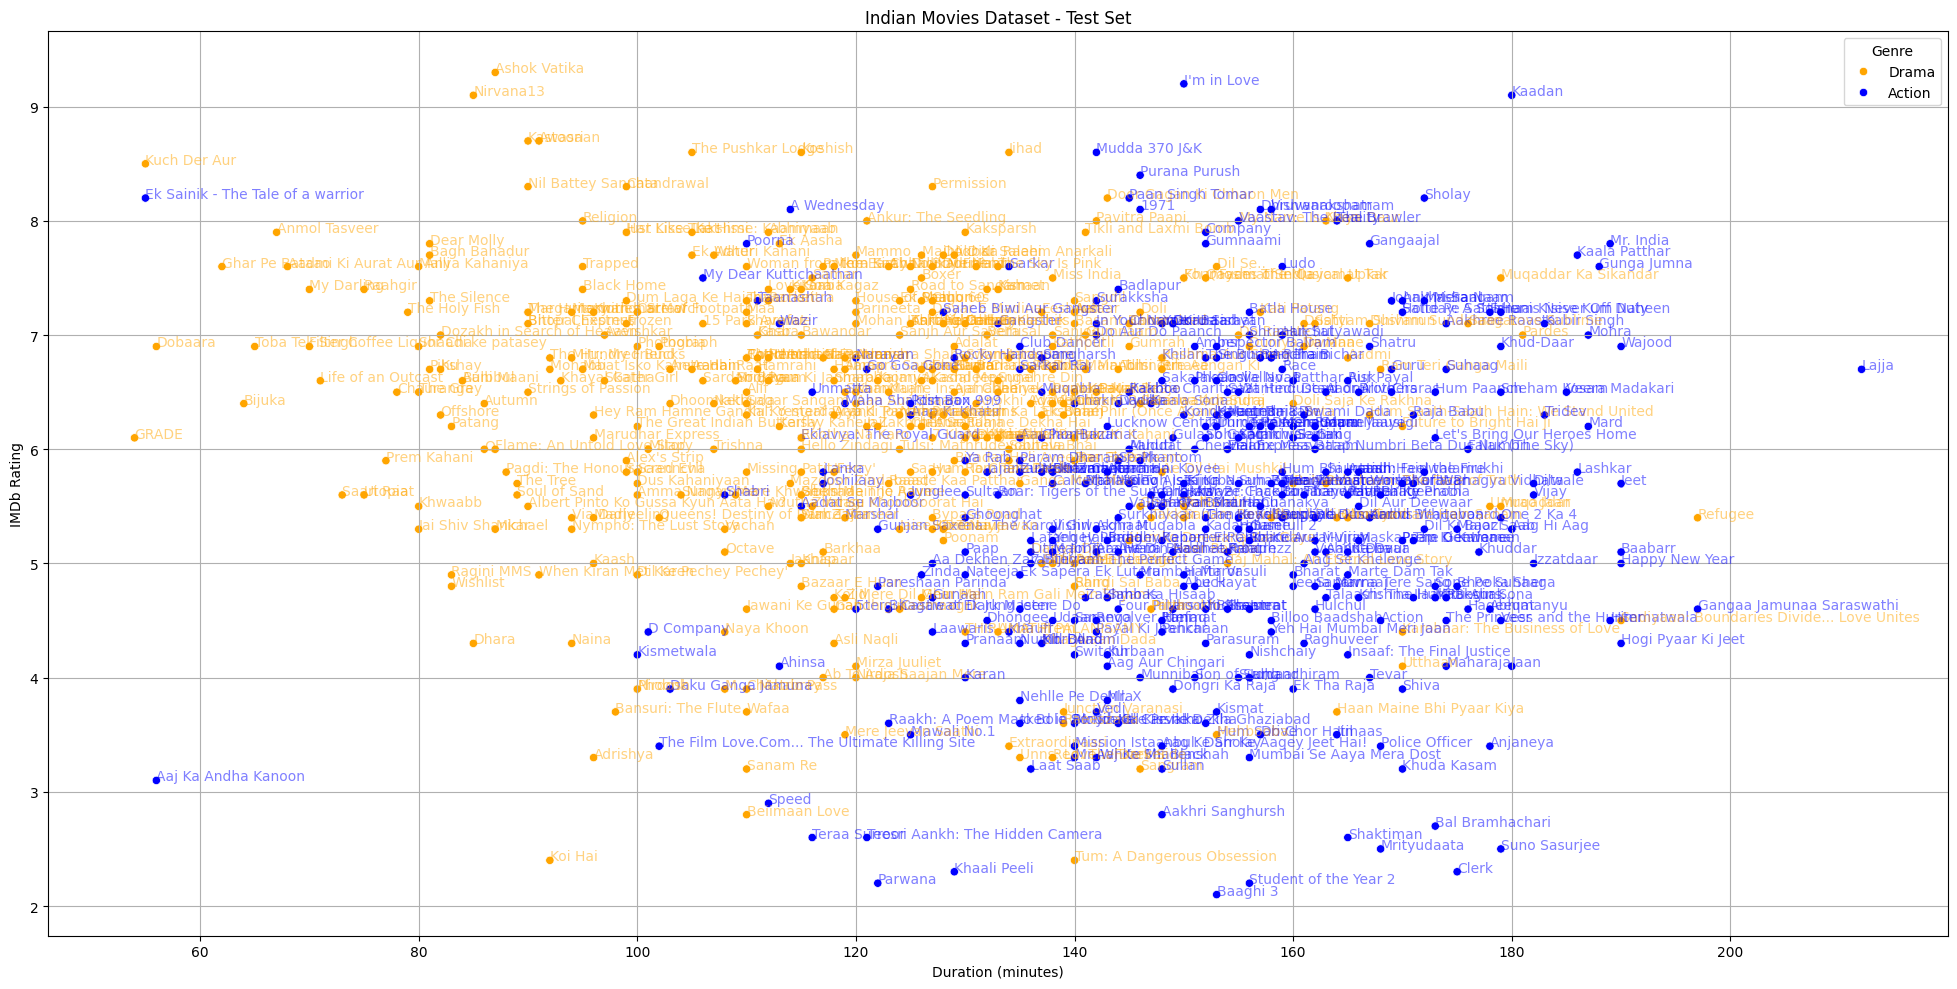

In [12]:
plt.figure(figsize=(20, 10))

# Plotting test data
sns.scatterplot(
    data=test_df,
    x="Duration",
    y="Rating",
    hue="Genre",
    palette={"Drama": "orange", "Action": "blue"},
    legend="brief",
)

# Annotating test data points
for idx, row in test_df.iterrows():
    color = "orange" if row["Genre"] == "Drama" else "blue"
    plt.annotate(
        row["Name"],
        (row["Duration"], row["Rating"]),
        color=color,
        alpha=0.5,
    )

plt.title("Indian Movies Dataset - Test Set")
plt.xlabel("Duration (minutes)")
plt.ylabel("IMDb Rating")
plt.legend(title="Genre")
plt.tight_layout()
plt.grid()
plt.show()

### Preprocessing


In [14]:
# Splitting train dataset into features and labels
X_train = train_df[["Duration", "Rating"]]
y_train = train_df["Genre"]

In [16]:
# Scaling the train features
stdscalar = StandardScaler()
X_train = stdscalar.fit_transform(X_train)

In [17]:
# Splitting test dataset into features and labels
X_test = test_df[["Duration", "Rating"]]
y_test = test_df["Genre"]

In [18]:
# Scaling the test features
X_test = stdscalar.transform(X_test)

### Model development and evaluation


In [20]:
knn_neighbors = range(1, 500, 2)
accuracy_scores = []

# Training and evaluating KNN for different values of k
for k in knn_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_scores.append(accuracy)

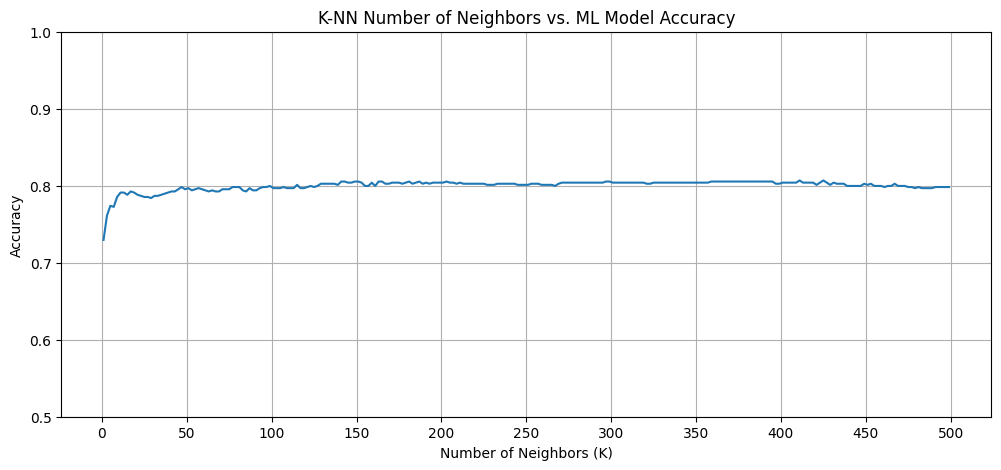

In [32]:
plt.figure(figsize=(12, 5))
plt.plot(knn_neighbors, accuracy_scores)

plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 501, 50))
plt.yticks(np.arange(0.5, 1.05, 0.1))

plt.title("K-NN Number of Neighbors vs. ML Model Accuracy")
plt.grid()
plt.show()

### Finding the best value of K


In [36]:
k_best = knn_neighbors[np.argmax(accuracy_scores)]
accuracy_best = max(accuracy_scores)
print(f"Best K: {k_best}, Best Accuracy: {accuracy_best:.4f}")

Best K: 411, Best Accuracy: 0.8069


### KNeighborsClassifier with best K

In [50]:
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

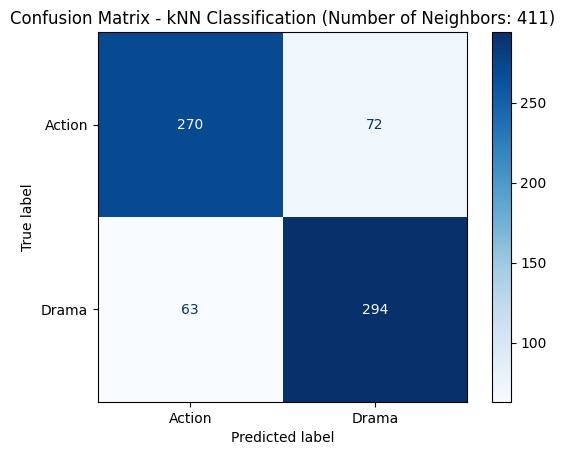

In [53]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Action", "Drama"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - kNN Classification (Number of Neighbors: {k_best})")
plt.show()

In [56]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Action", "Drama"]))

Classification Report:
              precision    recall  f1-score   support

      Action       0.81      0.79      0.80       342
       Drama       0.80      0.82      0.81       357

    accuracy                           0.81       699
   macro avg       0.81      0.81      0.81       699
weighted avg       0.81      0.81      0.81       699



## 2. Report


### Q1: What does the 'k' value in KNN determine?

**Ans:** The 'k' value determines the number of nearest neighbors considered when making a prediction.

---


### Q2: How is the optimal 'k' value in KNN typically chosen?

**Ans:** The optimal k is typically chosen by:

- Train KNN model for different k.

- Evaluate performance of each model using metrics (like accuracy).

- Select the k that gives the best validation performance.

---


### Q3: How does the value of 'k' affect variance and bias in KNN?

**Ans:** High 'K' leads to high bias and low variance, while low 'K' leads to low bias and high variance.

---


### Q4: Is KNN sensitive to outliers, and why?

**Ans:** Yes, KNN is sensitive to outliers. Since it makes predictions based only on the nearest neighbors, a nearby outlier can strongly influence the result and lead to incorrect prediction.

---


### Q5: How does the scale of features affect the performance of KNN?

**Ans:** KNN uses a distance metric, so features with large scales will dominate the distance calculation. Hence feature scaling is done to avoid this, which improves performance.

---
